## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.606528 -1.086133 -1.400728  0.309776 -0.717109  0.332048
1 -0.382044  0.425653  1.375449 -1.526812  0.437328 -0.045866
2 -0.557815 -0.276368  0.108847  1.303021 -1.219034 -0.149145
3  1.564542 -0.111362 -1.805917 -0.922929  0.574648  1.055226
4  1.557775  0.273190 -0.606192 -1.117265 -1.005036 -0.403301


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9916269	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9806944	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9706770	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9619091	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9527007	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9431196	total: 60.5ms	remaining: 10s
6:	learn: 0.9324195	total: 61.2ms	remaining: 8.68s
7:	learn: 0.9218122	total: 61.7ms	remaining: 7.66s
8:	learn: 0.9127679	total: 62.2ms	remaining: 6.85s
9:	learn: 0.9033953	total: 62.7ms	remaining: 6.2s
10:	learn: 0.8942921	total: 63.1ms	remaining: 5.68s
11:	learn: 0.8844488	total: 63.8ms	remaining: 5.25s
12:	learn: 0.8751722	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8662901	total: 64.7ms	remaining: 4.56s
14:	learn: 0.8588621	total: 65.2ms	remaining: 4.28s
15:	learn: 0.8500309	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8427172	total: 66.2ms	remaining: 3.83s
17:	learn: 0.8355783	total: 66.6ms	remaining: 3.63s
18:	learn: 0.8280477	total: 67.1ms	remaining: 3

108:	learn: 0.3764841	total: 109ms	remaining: 889ms
109:	learn: 0.3733167	total: 109ms	remaining: 884ms
110:	learn: 0.3708772	total: 110ms	remaining: 878ms
111:	learn: 0.3684071	total: 110ms	remaining: 873ms
112:	learn: 0.3657169	total: 110ms	remaining: 867ms
113:	learn: 0.3624826	total: 111ms	remaining: 864ms
114:	learn: 0.3599496	total: 112ms	remaining: 859ms
115:	learn: 0.3568178	total: 112ms	remaining: 854ms
116:	learn: 0.3537929	total: 113ms	remaining: 850ms
117:	learn: 0.3514678	total: 113ms	remaining: 845ms
118:	learn: 0.3490523	total: 113ms	remaining: 839ms
119:	learn: 0.3463515	total: 114ms	remaining: 834ms
120:	learn: 0.3434931	total: 114ms	remaining: 830ms
121:	learn: 0.3411563	total: 115ms	remaining: 825ms
122:	learn: 0.3385009	total: 115ms	remaining: 821ms
123:	learn: 0.3357549	total: 116ms	remaining: 816ms
124:	learn: 0.3333822	total: 116ms	remaining: 812ms
125:	learn: 0.3303372	total: 116ms	remaining: 808ms
126:	learn: 0.3281796	total: 117ms	remaining: 805ms
127:	learn: 

270:	learn: 0.1202086	total: 188ms	remaining: 505ms
271:	learn: 0.1193028	total: 188ms	remaining: 504ms
272:	learn: 0.1184454	total: 189ms	remaining: 502ms
273:	learn: 0.1176924	total: 189ms	remaining: 501ms
274:	learn: 0.1166842	total: 190ms	remaining: 500ms
275:	learn: 0.1159297	total: 190ms	remaining: 498ms
276:	learn: 0.1151415	total: 190ms	remaining: 497ms
277:	learn: 0.1145564	total: 191ms	remaining: 496ms
278:	learn: 0.1137025	total: 191ms	remaining: 495ms
279:	learn: 0.1128700	total: 192ms	remaining: 494ms
280:	learn: 0.1120785	total: 192ms	remaining: 492ms
281:	learn: 0.1114024	total: 193ms	remaining: 492ms
282:	learn: 0.1104587	total: 194ms	remaining: 492ms
283:	learn: 0.1098084	total: 194ms	remaining: 490ms
284:	learn: 0.1091707	total: 195ms	remaining: 489ms
285:	learn: 0.1084386	total: 195ms	remaining: 487ms
286:	learn: 0.1077971	total: 196ms	remaining: 486ms
287:	learn: 0.1069341	total: 196ms	remaining: 485ms
288:	learn: 0.1062853	total: 197ms	remaining: 484ms
289:	learn: 

492:	learn: 0.0391992	total: 292ms	remaining: 301ms
493:	learn: 0.0390231	total: 293ms	remaining: 300ms
494:	learn: 0.0388325	total: 294ms	remaining: 299ms
495:	learn: 0.0386043	total: 294ms	remaining: 299ms
496:	learn: 0.0385339	total: 294ms	remaining: 298ms
497:	learn: 0.0383650	total: 295ms	remaining: 297ms
498:	learn: 0.0381522	total: 295ms	remaining: 296ms
499:	learn: 0.0380091	total: 295ms	remaining: 295ms
500:	learn: 0.0379412	total: 296ms	remaining: 295ms
501:	learn: 0.0377761	total: 296ms	remaining: 294ms
502:	learn: 0.0376254	total: 297ms	remaining: 293ms
503:	learn: 0.0374847	total: 297ms	remaining: 293ms
504:	learn: 0.0373484	total: 298ms	remaining: 292ms
505:	learn: 0.0372570	total: 298ms	remaining: 291ms
506:	learn: 0.0371129	total: 299ms	remaining: 290ms
507:	learn: 0.0369673	total: 299ms	remaining: 290ms
508:	learn: 0.0368783	total: 300ms	remaining: 289ms
509:	learn: 0.0367412	total: 300ms	remaining: 288ms
510:	learn: 0.0364913	total: 301ms	remaining: 288ms
511:	learn: 

660:	learn: 0.0194240	total: 370ms	remaining: 190ms
661:	learn: 0.0193981	total: 371ms	remaining: 189ms
662:	learn: 0.0193330	total: 372ms	remaining: 189ms
663:	learn: 0.0193034	total: 372ms	remaining: 188ms
664:	learn: 0.0192782	total: 372ms	remaining: 188ms
665:	learn: 0.0192145	total: 373ms	remaining: 187ms
666:	learn: 0.0191610	total: 374ms	remaining: 187ms
667:	learn: 0.0190723	total: 374ms	remaining: 186ms
668:	learn: 0.0190598	total: 374ms	remaining: 185ms
669:	learn: 0.0189891	total: 375ms	remaining: 185ms
670:	learn: 0.0189125	total: 375ms	remaining: 184ms
671:	learn: 0.0188841	total: 376ms	remaining: 183ms
672:	learn: 0.0188327	total: 376ms	remaining: 183ms
673:	learn: 0.0187724	total: 377ms	remaining: 182ms
674:	learn: 0.0186869	total: 377ms	remaining: 182ms
675:	learn: 0.0186598	total: 378ms	remaining: 181ms
676:	learn: 0.0186478	total: 378ms	remaining: 180ms
677:	learn: 0.0185805	total: 379ms	remaining: 180ms
678:	learn: 0.0185686	total: 379ms	remaining: 179ms
679:	learn: 

878:	learn: 0.0100310	total: 476ms	remaining: 65.5ms
879:	learn: 0.0099936	total: 476ms	remaining: 65ms
880:	learn: 0.0099561	total: 477ms	remaining: 64.4ms
881:	learn: 0.0099195	total: 477ms	remaining: 63.9ms
882:	learn: 0.0098837	total: 478ms	remaining: 63.3ms
883:	learn: 0.0098300	total: 478ms	remaining: 62.7ms
884:	learn: 0.0097936	total: 479ms	remaining: 62.2ms
885:	learn: 0.0097577	total: 479ms	remaining: 61.6ms
886:	learn: 0.0097173	total: 480ms	remaining: 61.1ms
887:	learn: 0.0096892	total: 480ms	remaining: 60.6ms
888:	learn: 0.0096590	total: 481ms	remaining: 60.1ms
889:	learn: 0.0096316	total: 482ms	remaining: 59.5ms
890:	learn: 0.0095996	total: 482ms	remaining: 59ms
891:	learn: 0.0095613	total: 483ms	remaining: 58.4ms
892:	learn: 0.0095306	total: 483ms	remaining: 57.9ms
893:	learn: 0.0094965	total: 484ms	remaining: 57.3ms
894:	learn: 0.0094572	total: 484ms	remaining: 56.8ms
895:	learn: 0.0094284	total: 485ms	remaining: 56.3ms
896:	learn: 0.0093901	total: 485ms	remaining: 55.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

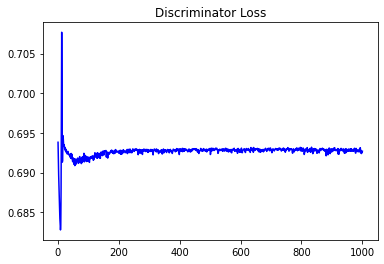

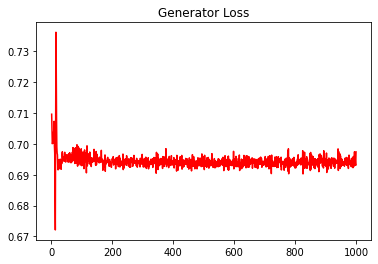

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12526990463732243


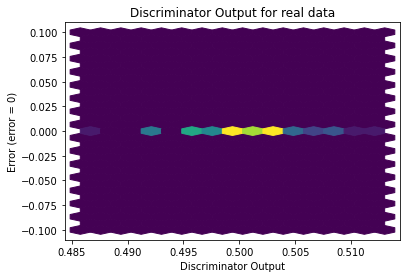

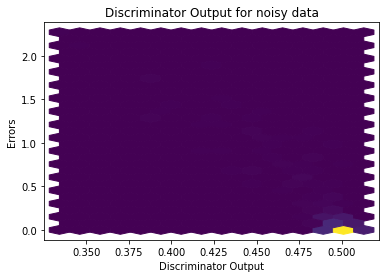

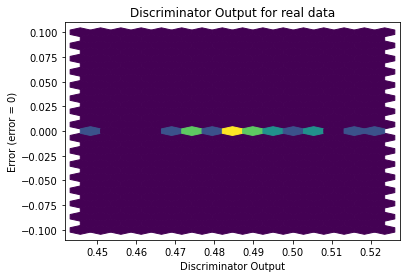

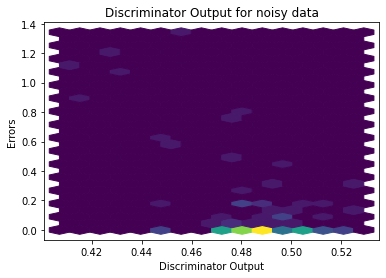

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


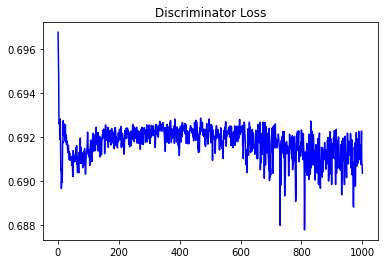

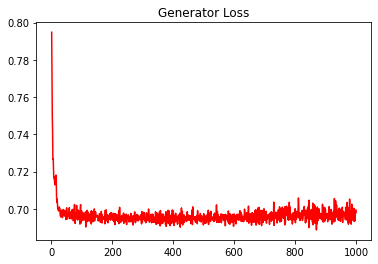

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1414073419281042


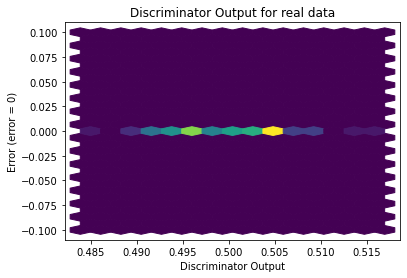

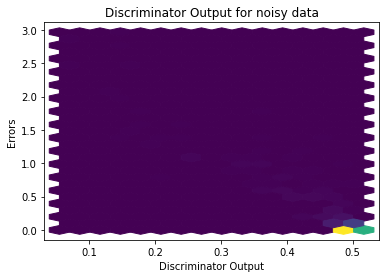

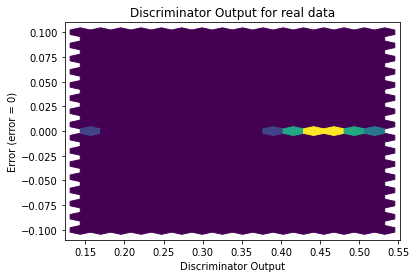

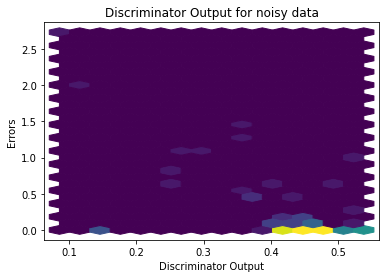

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3333]], requires_grad=True)
